<a href="https://colab.research.google.com/github/slavyolov/Algorithms/blob/main/NFT_SU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Code block where warnings are ignored
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # Ignore all warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


https://www.datasciencesociety.net/what-is-nft/

## Data Catalog

### “hackathon_tweets”

userscreenname – the Twitter name of the profile

username – the Twitter handle of the profile

timestamp – date and time of the tweet

text – contains information about the Twitter name, handle and date of the tweet

embedded_text – the full text body of the tweet

emojis – the emojis used in the text body of the tweet

comments – the amount of comments on the tweet (if NaN, there were no comments)

likes – the amount of likes on the tweet

retweets – the amount of retweets on the tweet (similar to shares on Facebook)

tweet_url – the link to the original tweet

user – the name of the profile of the collection or the creator of the collection

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tweets_df = pd.read_csv("/content/drive/MyDrive/NFT/hackathon_tweets.csv")
tweets_df.drop(columns=["Unnamed: 0"], inplace=True)
tweets_df.head()
# print(df.info())
# print(df.describe().T)

,userscreenname,username,timestamp,text,embedded_text,emojis,comments,likes,retweets,tweet_url,user
0,RTFKT Studios,@RTFKTstudios,2021-01-05 23:29:01,"RTFKT Studios\n@RTFKTstudios\n·\nJan 5, 2021",When RTFKT Elite collab \nRTFKT // NBO\n@NB04D...,🔥 🔥 🔥,2,3,26,https://twitter.com/RTFKTstudios/status/134659...,RTFKTstudios
1,RTFKT Studios,@RTFKTstudios,2021-01-10 19:36:35,"RTFKT Studios\n@RTFKTstudios\n·\nJan 10, 2021","Cybersneaker coming late 2021 \n0:12\n7,797 vi...",⚡,5,48,153,https://twitter.com/RTFKTstudios/status/134835...,RTFKTstudios
2,RTFKT Studios,@RTFKTstudios,2021-01-11 20:59:57,"RTFKT Studios\n@RTFKTstudios\n·\nJan 11, 2021","New year, new tools \nintroducing the Unreal S...",🧪,6,14,51,https://twitter.com/RTFKTstudios/status/134873...,RTFKTstudios
3,RTFKT Studios,@RTFKTstudios,2021-01-14 21:22:47,"RTFKT Studios\n@RTFKTstudios\n·\nJan 14, 2021",POKEMON CHALLENGE// CC XIV\n3RD Place :: \n@Ki...,⚡ ⚡ 🥉 👟,1,8,54,https://twitter.com/RTFKTstudios/status/134982...,RTFKTstudios
4,RTFKT Studios,@RTFKTstudios,2021-01-14 21:28:56,"RTFKT Studios\n@RTFKTstudios\n·\nJan 14, 2021",POKEMON CHALLENGE// CC XIV\n2ND Place :: \n@th...,⚡ ⚡ 🥈 👟,1,15,101,https://twitter.com/RTFKTstudios/status/134983...,RTFKTstudios


In [5]:
tweets_df.groupby(["username", "userscreenname", "user"])["username"].count()

username        userscreenname             user         
@AzukiOfficial  Azuki                      AzukiOfficial      12
@BoredApeYC     Bored Ape Yacht Club       BoredApeYC        270
@MeebitsDAO     MeebitsDAO (minting now!)  MeebitsDAO        497
@RTFKTstudios   RTFKT Studios              RTFKTstudios     1393
@coolcatsnft    Cool Cats                  coolcatsnft       649
@doodles        doodles                    doodles           246
@pudgypenguins  Pudgy Penguins             pudgypenguins      13
@pudgypengus    Penguins                   pudgypenguins       1
Name: username, dtype: int64

#### Data processing Tweets

In [6]:
tweets_df["date"] = pd.to_datetime(tweets_df["timestamp"]).dt.date

# Tweets per date per user
tweets_count = tweets_df.groupby(["user", "date"])["username"].count().reset_index()
tweets_count

# map the names properly so that they corespond to the ones available in the sales data
mapping_dict = {
    'AzukiOfficial': 'Azuki',
    'pudgypenguins': 'PudgyPenguins',
    'doodles': 'Doodles',
    'coolcatsnft': 'Cool Cats',
    'MeebitsDAO': 'Meebits',
    'BoredApeYC': 'BoredApeYachtClub'
}

# Recode the "user" column using the mapping dictionary
tweets_count["user"] = tweets_count["user"].replace(mapping_dict)

# drop the RTFKTstudios values
tweets_count = tweets_count[tweets_count["user"] != 'RTFKTstudios']

# Rename the columns
tweets_count = tweets_count.rename(columns={'user': 'tokenName',
                                            'username': 'tweet_count'
                                            })
tweets_count

,tokenName,date,tweet_count
0,Azuki,2022-03-30,1
1,Azuki,2022-03-31,3
2,Azuki,2022-04-01,1
3,Azuki,2022-04-02,3
4,Azuki,2022-04-09,1
...,...,...,...
1183,PudgyPenguins,2022-04-08,2
1184,PudgyPenguins,2022-04-09,1
1185,PudgyPenguins,2022-04-10,2
1186,PudgyPenguins,2022-04-11,1


### Traits
contract – contract for returned NFT

token_id – The number of the Token in the collection, unique to each Token

nft-url – uri representing the location of the NFT’s original metadata blob. This is a backup for you to parse when the metadata field is not automatically populated.

hint: to download the image you need to add to the url. Ex. if you are workind with azuki collection add “/0.png”

trait_type – traits/attributes/characteristics for each NFT asset.

value – traits/attributes/characteristics for each NFT asset.

In [7]:
traits_df = pd.read_csv("/content/drive/MyDrive/NFT/NFT_Hackathon_Traits.csv")
traits_df.drop(columns=["Unnamed: 0"], inplace=True)
traits_df.head()

,collection,contract,token_id,nft_url,trait_type,value
0,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Type,Human
1,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Water
2,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Clothing,Pink Oversized Kimono
3,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Eyes,Striking
4,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Mouth,Frown


In [8]:
print("Number of unique trait combinations per token_id : ", traits_df[["token_id"]].nunique()[0])

# block number & time stamp

Number of unique trait combinations per token_id :  24212


In [9]:
print("Number of unique trait combinations per trait_typ : ", traits_df[["trait_type"]].nunique()[0])

# block number & time stamp

Number of unique trait combinations per trait_typ :  55


In [10]:
unique_values = traits_df["trait_type"].unique()
trait_list = unique_values.tolist()
trait_list = list(set(trait_list))
trait_list

lowercase_list = [item.lower() for item in trait_list]
unique_lower_list = list(set(lowercase_list))

print(len(trait_list))
print(len(unique_lower_list))
unique_lower_list

55
49


['glasses',
 'shirt',
 'shoes',
 'headgear',
 'shirt color',
 'fur',
 'clothes',
 'helmet',
 'background',
 'eyewear',
 'jersey number',
 'mouth',
 'hats',
 'glasses color',
 'type',
 'accessories',
 'jewelry',
 'shoes color',
 'hat',
 'beard',
 'piercing',
 'facial feature',
 'clothing',
 'back',
 'tattoo motif',
 'body',
 'hair',
 'tier',
 'hair color',
 'beard color',
 'hat color',
 'necklace',
 'earring',
 'overshirt color',
 'skin',
 'eye color',
 'offhand',
 'head',
 'dna',
 'pants',
 'hair style',
 'overshirt',
 'eyes',
 'special',
 'neck',
 'face',
 'ear',
 'pants color',
 'name']

In [11]:
traits_count = pd.DataFrame(traits_df.groupby(["trait_type", "value"])["token_id"].count())
traits_count = traits_count.reset_index()
traits_count

,trait_type,value,token_id
0,Accessories,Cross Earring,377
1,Accessories,GLD Round,275
2,Accessories,GLD STUD,132
3,Accessories,Gold Round Earrings,165
4,Accessories,Neo Earrings,52
...,...,...,...
3230,tier,cool_2,2584
3231,tier,exotic_1,499
3232,tier,exotic_2,148
3233,tier,wild_1,1743


In [12]:
traits_df[traits_df["trait_type"] == "Hair"]

,collection,contract,token_id,nft_url,trait_type,value
1,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Water
8,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,1,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Pink Hairband
15,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,2,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Pink Flowy
22,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,3,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Green Spiky
31,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,4,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Brown Dreadlocks
...,...,...,...,...,...,...
238296,clone_x,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,18891,https://clonex-assets.rtfkt.com/18891,Hair,RD Long
238299,clone_x,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,18892,https://clonex-assets.rtfkt.com/18892,Hair,BLCK Spike
238304,clone_x,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,18893,https://clonex-assets.rtfkt.com/18893,Hair,BLCK Unkept
238310,clone_x,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,18894,https://clonex-assets.rtfkt.com/18894,Hair,BLU Hacker


#### Data processing

In [13]:
# Lowercase the traits to have unique values
traits_prp_df = traits_df.copy(deep=True)
traits_prp_df["trait_type"] = traits_prp_df["trait_type"].str.lower()
traits_prp_df["value"] = traits_prp_df["value"].str.lower()

# Text
traits_prp_df["trait_type_and_value"] = traits_prp_df["trait_type"] + "_" + traits_prp_df["value"]

# create text corpus (just on the values so that it is not dominated by the type)
traits_prp_df_grouped = traits_prp_df.groupby(["contract", "token_id"])["value"].agg(lambda x: ' '.join(x)).reset_index()
corpus = traits_prp_df_grouped["value"].to_list()

# One contract and toke_id has different charachteristics, try tf-idf
# traits_prp_df[(traits_prp_df["contract"] == '0xed5af388653567af2f388e6224dc7c4b3241c544') & (traits_df["token_id"] == 9997)]
# traits_prp_df[(traits_prp_df["contract"] == '0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b') & (traits_df["token_id"] == 18893)]

In [25]:
traits_prp_df_grouped_2 = pd.DataFrame(traits_prp_df.groupby(["contract", "value"])["token_id"].count()).reset_index()
traits_prp_df_grouped_2 = traits_prp_df_grouped_2.rename(columns={'token_id': 'count_of_values'})

traits_prp_df_grouped_2_tot = pd.DataFrame(traits_prp_df.groupby(["contract"])["token_id"].count()).reset_index()
traits_prp_df_grouped_2_tot = traits_prp_df_grouped_2_tot.rename(columns={'token_id': 'total_values'})

traits_final = pd.merge(traits_prp_df_grouped_2, traits_prp_df_grouped_2_tot, on=["contract"], how="left")
traits_final["rarity_trait"] = traits_final["count_of_values"] / traits_final["total_values"]

# target table
traits_target = traits_prp_df[["contract", "token_id", "value"]].drop_duplicates()

# FInal table
traits_fin = pd.merge(traits_target,
                         traits_final[["contract", "value", "rarity_trait"]],
                         on=["contract", "value"], how="left")
traits_fin = traits_fin.groupby(["contract", "token_id"])["rarity_trait"].sum().reset_index()
traits_fin = traits_fin.rename(columns={'token_id': 'tokenID'})
# Insight : The lower the value the more unique (rare) is the NFT value (rarity_trait)

In [107]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer
vectorizer = TfidfVectorizer()
# vectorizer = TfidfVectorizer(norm = None) # apply without normalization

# Fit
X = vectorizer.fit_transform(corpus)
data_matrix_tf_idf = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
data_matrix_tf_idf

,11,1tooth,28,333,369,3d,3rd,404,420,60s,...,zzgttgzz,zzgwvwgv,zzgwwgzz,zztwz,zztxzgxv,zzvgzvtv,zzvxgzz,zzvxxvzz,zzxttxzz,zzzwxtwt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#for simplicity just take the frequency of occurence

In [14]:
print("Number of unique trait combinations per trait_typ : ", traits_prp_df[["trait_type"]].nunique()[0])

# block number & time stamp

Number of unique trait combinations per trait_typ :  49


### Sales

block_number – number of the block in which the transaction is recorded

timeStamp – the date and time in which the transaction is mined,UNIX timestamp
hash – the string representing the transaction hash to check the execution status
nonce – The nonce is the number of transactions sent from a given address.

blockHash – the string representing the hash of the transaction

from – theETH address of the sender of the Token

contractAddress – the contract address of the ERC-20 token

to – the ETH address which sent the token

tokenID – The number of the Token in the collection, unique to each Token

tokenName – the long name by which the token contract should be known

tokenSymbol – the symbol by which the token contract should be known

tokenDecimal – refers to how divisible a token can be, from 0 (not at all divisible) to 18 (pretty much continuous) and even higher if required. Technically speaking, the decimals value is the number of digits that come after the decimal place when displaying token values on-screen.

gas – Maximum gas allocated for the transaction/amount of gas supplied for this transaction

gasPrice – cost per unit of gas specified for this transaction in ether or gwei, depending on the   decimal value

gasUsed – the amount of gas used for this specific transaction

currency  – The cryptocurrency used to pay for the sale, either ETH or one of the stablecoins

value – The scalar value equal to the number of units (in Ethereum Wei) to be transferred to the message call’s recipient or, in the case of contract creation, as an endowment to the newly created contract.

valueUSD – value in USD

In [27]:
sales = pd.read_csv("/content/drive/MyDrive/NFT/NFT_Hackathon_Sale.csv")
sales.head()

,blockNumber,timeStamp,hash,from,contractAddress,to,tokenID,tokenName,tokenSymbol,gasPrice,currency,amount,amountUsd
0,13988541,1641961048,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xd45058bf25bbd8f586124c479d384c8c708ce23a,0,Azuki,AZUKI,144500135604,ETH,0.0,0.0
1,13988541,1641961048,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xd45058bf25bbd8f586124c479d384c8c708ce23a,1,Azuki,AZUKI,144500135604,ETH,0.0,0.0
2,13988541,1641961048,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xd45058bf25bbd8f586124c479d384c8c708ce23a,2,Azuki,AZUKI,144500135604,ETH,0.0,0.0
3,13988541,1641961048,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xd45058bf25bbd8f586124c479d384c8c708ce23a,3,Azuki,AZUKI,144500135604,ETH,0.0,0.0
4,13988541,1641961048,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xd45058bf25bbd8f586124c479d384c8c708ce23a,4,Azuki,AZUKI,144500135604,ETH,0.0,0.0


#### EDA

In [28]:
print("Number of unique transactions per blockNumber and timeStamp : ", sales[["blockNumber", "timeStamp"]].nunique()[0])

# block number & time stamp

Number of unique transactions per blockNumber and timeStamp :  257434


In [29]:
# Token collections
print("Token collections :\n")
sales.groupby(["contractAddress", "tokenName"])["contractAddress"].count()

Token collections :



contractAddress                             tokenName         
0x1a92f7381b9f03921564a437210bb9396471050c  Cool Cats             54089
0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b  CloneX                45130
0x60e4d786628fea6478f785a6d7e704777c86a7c6  MutantApeYachtClub    69659
0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7  Meebits               61032
0x8a90cab2b38dba80c64b7734e58ee1db38b8992e  Doodles               48618
0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d  BoredApeYachtClub     63175
0xbd3531da5cf5857e7cfaa92426877b022e612cf8  PudgyPenguins         48426
0xed5af388653567af2f388e6224dc7c4b3241c544  Azuki                 41274
Name: contractAddress, dtype: int64

In [30]:
print("Unique number of sellers", sales[["from"]].nunique()[0])
print("Unique number of buyers", sales[["to"]].nunique()[0])

Unique number of sellers 73795
Unique number of buyers 94964


In [31]:
# Two currencies
# Decision take only ETH and filter in the data prep
print("Currency count", sales.groupby("currency")["currency"].count())


Currency count currency
ETH    431164
USD       239
Name: currency, dtype: int64


In [32]:
print("Unique number of 'gasPrice' column", sales[["gasPrice"]].nunique()[0])


Unique number of 'gasPrice' column 201565


In [33]:
print("Unique number of 'amount' column", sales[["amount"]].nunique()[0])


Unique number of 'amount' column 25116


In [34]:
sales[["amountUsd"]].describe()

,amountUsd
count,4.314030e+05
mean,3.205303e+04
std,4.735820e+05
min,0.000000e+00
25%,0.000000e+00
50%,4.768894e+02
75%,1.056351e+04
max,5.045316e+07


#### Data processing

In [35]:
# FIlter only ETH currency
sales_prp = sales[sales["currency"] == "ETH"]

# Rename the 'contractAddress' column to 'contract'
sales_prp = sales_prp.rename(columns={'contractAddress': 'contract'})

# Convert the 'timeStamp' column to datetime
sales_prp['timeStamp'] = pd.to_datetime(sales_prp['timeStamp'], unit='s')
sales_prp.head()

# create a key
sales_prp["key"] = sales_prp['from'].str.cat([sales_prp['to'],
                                              sales_prp['tokenName'].astype(str)], sep='_')

# create rarity column by dividing the serial number of NTF per collection / total number of NFTs in that collection
# late to be able to assess if the price of the collection is affected by its size

total_number_of_nft_per_serial_nmbr = sales_prp\
    .groupby(["contract", "tokenID"])["tokenName"].count().reset_index()
total_number_of_nft_per_serial_nmbr = total_number_of_nft_per_serial_nmbr\
    .rename(columns={'tokenName': 'total_nmbr_of_nfts_per_serial_nmbr'})

total_number_of_nft = sales_prp.groupby("contract")["tokenName"].count().reset_index()
total_number_of_nft = total_number_of_nft.rename(columns={'tokenName': 'total_nmbr_of_nfts'})

sales_prp = pd.merge(sales_prp, total_number_of_nft_per_serial_nmbr, on=["contract", "tokenID"], how="left")
sales_prp = pd.merge(sales_prp, total_number_of_nft, on="contract", how="left")

# the lower the value of rarity the rarer the NFT
sales_prp["rarity"] = sales_prp["total_nmbr_of_nfts_per_serial_nmbr"] / sales_prp["total_nmbr_of_nfts"]
sales_prp

# Exclude the amount == 0
sales_prp = sales_prp[sales_prp["amount"] > 0]

# Calculate the price lag column
# Sort the dataframe by tokenID and timeStamp
sales_prp = sales_prp.sort_values(["tokenID", "timeStamp"])

# Calculate the price lag within each tokenID group
sales_prp["price_lag"] = sales_prp.groupby("tokenID")["amount"].shift(1)
sales_prp["price_lag_2"] = sales_prp.groupby("tokenID")["amount"].shift(2)
sales_prp["price_lag_3"] = sales_prp.groupby("tokenID")["amount"].shift(3)
sales_prp["price_first_difference"] = sales_prp.groupby("tokenID")["amount"].diff()
sales_prp["last_4_median"] = sales_prp.groupby("tokenID")["amount"].rolling(4, min_periods=1).median().reset_index(level=0, drop=True)

# Add date column so that we can join with the tweets
sales_prp["date"] = pd.to_datetime(sales_prp["timeStamp"]).dt.date
sales_prp

,blockNumber,timeStamp,hash,from,contract,to,tokenID,tokenName,tokenSymbol,gasPrice,...,key,total_nmbr_of_nfts_per_serial_nmbr,total_nmbr_of_nfts,rarity,price_lag,price_lag_2,price_lag_3,price_first_difference,last_4_median,date
104352,13117215,2021-08-29 00:40:58,0x612a5190e324f5455432af3aa2c97e9d35f036929263...,0x0000000000000000000000000000000000000000,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0x9056d15c49b19df52ffad1e6c11627f035c0c960,0,MutantApeYachtClub,MAYC,51851145919,...,0x0000000000000000000000000000000000000000_0x9...,1,69613,0.000014,NaN,NaN,NaN,NaN,2.999444,2021-08-29
296248,13449414,2021-10-19 17:03:25,0x663e8b5d7bd8871fba2b1fc969de039c0169e6e29222...,0xeff53613068a15a6845943e447fca03936c283c8,0x8a90cab2b38dba80c64b7734e58ee1db38b8992e,0xad097fdcd58535250c59807d6683e0a6b688d6cc,0,Doodles,DOODLE,111000000000,...,0xeff53613068a15a6845943e447fca03936c283c8_0xa...,2,48608,0.000041,2.999444,NaN,NaN,7.000556,6.499722,2021-10-19
234962,12878191,2021-07-22 19:59:45,0x644c8396d4ee9ba9a95af419a11fd2ee28bb7739f95e...,0x0000000000000000000000000000000000000000,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0x9ccfd6d678d1b467fceb11cd115e6c7afa323460,1,PudgyPenguins,PPG,125000000000,...,0x0000000000000000000000000000000000000000_0x9...,6,48404,0.000124,NaN,NaN,NaN,NaN,0.030000,2021-07-22
250655,12963339,2021-08-05 06:14:53,0x940c0b482b2795324979ac9ad6da79243acc504e2c1d...,0x9ccfd6d678d1b467fceb11cd115e6c7afa323460,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0xe558619863102240058d9784a0adf7c886fb92fc,1,PudgyPenguins,PPG,43000000000,...,0x9ccfd6d678d1b467fceb11cd115e6c7afa323460_0xe...,6,48404,0.000124,0.030000,NaN,NaN,0.970000,0.515000,2021-08-05
255855,12984260,2021-08-08 11:49:40,0xff362f3f07c43f8750609320d8871f2f536173087007...,0xe558619863102240058d9784a0adf7c886fb92fc,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0xb8cb095ecbb869e7f47028d0ac3a6e7b63d59841,1,PudgyPenguins,PPG,33258559128,...,0xe558619863102240058d9784a0adf7c886fb92fc_0xb...,6,48404,0.000124,1.000000,0.03,NaN,1.800000,1.000000,2021-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160010,14105285,2022-01-30 05:34:58,0x21d32f0778931c5a3bacc9274115580ed65e5550fadf...,0x1bf22a19a8d0b9cdfdd5c0859b5bd72c05f2d6a2,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0x20c38f3daea55fa8e706efdefe3b1cff65eeecb1,29956,MutantApeYachtClub,MAYC,83892879132,...,0x1bf22a19a8d0b9cdfdd5c0859b5bd72c05f2d6a2_0x2...,1,69613,0.000014,NaN,NaN,NaN,NaN,31.500000,2022-01-30
117052,13121204,2021-08-29 15:33:47,0x28fd8591fe9d8b088b90aeab39b5652ec9966b1fa8f3...,0x40211a9c8a1fefdafe58fd60bbdb067050d769cc,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0x26fca9a99e95be90447a25a1da852d870417aac9,29962,MutantApeYachtClub,MAYC,75643636509,...,0x40211a9c8a1fefdafe58fd60bbdb067050d769cc_0x2...,2,69613,0.000029,NaN,NaN,NaN,NaN,6.800000,2021-08-29
173781,14471563,2022-03-28 00:52:58,0x7ab0b733083381284fc0b0b69bf375393bf8621d172a...,0x4836ae11037f696693c2916834754fa6c2ecc27d,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0x6b92686c40747c85809a6772d0eda8e22a77c60c,29968,MutantApeYachtClub,MAYC,31536333792,...,0x4836ae11037f696693c2916834754fa6c2ecc27d_0x6...,3,69613,0.000043,NaN,NaN,NaN,NaN,82.005000,2022-03-28
121768,13137363,2021-09-01 03:26:49,0xda43d4a8e6e9add176f69f339fc2df871509df200208...,0xcc22f5b0f39d10be2a5414a53650b281538130a9,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0xed08fe81611f7a91384736cea990a6692d6d7249,29970,MutantApeYachtClub,MAYC,115792791536,...,0xcc22f5b0f39d10be2a5414a53650b281538130a9_0xe...,2,69613,0.000029,NaN,NaN,NaN,NaN,6.330000,2021-09-01


In [36]:
# Check with one data frame
sales_prp[[ "timeStamp", "rarity", "amount", "price_lag", "price_lag_2", "price_lag_3", "price_first_difference","last_4_median"]
          ][sales_prp["tokenID"] == 16938]

,timeStamp,rarity,amount,price_lag,price_lag_2,price_lag_3,price_first_difference,last_4_median
218559,2021-12-31 01:45:43,0.002344,2.973320,NaN,NaN,NaN,NaN,2.97332
218674,2022-01-02 18:40:28,0.002344,3.488800,2.973320,NaN,NaN,0.515480,3.23106
219708,2022-01-11 20:56:18,0.002344,4.100000,3.488800,2.97332,NaN,0.611200,3.48880
219955,2022-01-11 23:35:12,0.002344,320.000000,4.100000,3.48880,2.97332,315.900000,3.79440
219982,2022-01-11 23:49:30,0.002344,313.000000,320.000000,4.10000,3.48880,-7.000000,158.55000
...,...,...,...,...,...,...,...,...
227871,2022-02-22 07:08:43,0.002344,5570.000000,3000.000000,6100.00000,5000.00000,2570.000000,5285.00000
227872,2022-02-22 07:27:17,0.002344,4000.000000,5570.000000,3000.00000,6100.00000,-1570.000000,4785.00000
227921,2022-02-23 07:09:26,0.002344,5776.000000,4000.000000,5570.00000,3000.00000,1776.000000,4785.00000
230959,2022-03-12 20:36:16,0.002344,5.128075,5776.000000,4000.00000,5570.00000,-5770.871925,4785.00000


In [37]:
# check aggregation logic rarity
# total_number_of_nft_per_serial_nmbr[total_number_of_nft_per_serial_nmbr["tokenID"] == 16938]

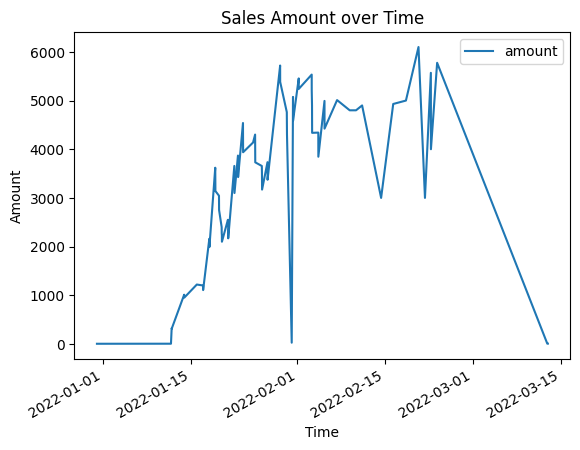

In [38]:
import matplotlib.pyplot as plt

# Assuming you have a filtered dataframe named 'filtered_df' containing columns 'amount' and 'timeStamp'

# Create the line plot
filtered_df = sales_prp[["amount", "timeStamp"]][sales_prp["tokenID"] == 16938].sort_values("timeStamp")
filtered_df.plot(x='timeStamp', y='amount', kind='line')

# Set the plot title and labels
plt.title("Sales Amount over Time")
plt.xlabel("Time")
plt.ylabel("Amount")

# Display the plot
plt.show()

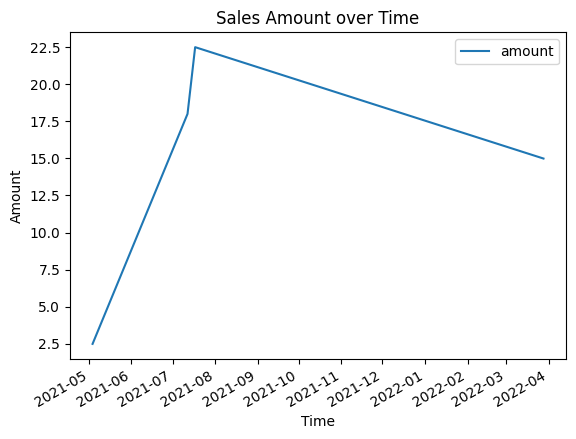

In [39]:
import matplotlib.pyplot as plt

# Assuming you have a filtered dataframe named 'filtered_df' containing columns 'amount' and 'timeStamp'

# Create the line plot
filtered_df = sales_prp[["amount", "timeStamp"]][sales_prp["tokenID"] == 17241].sort_values("timeStamp")
filtered_df.plot(x='timeStamp', y='amount', kind='line')

# Set the plot title and labels
plt.title("Sales Amount over Time")
plt.xlabel("Time")
plt.ylabel("Amount")

# Display the plot
plt.show()

### Combine datasets

In [87]:
# Merge sales and tweets and fillna
data_ready = pd.merge(sales_prp, tweets_count, on=["date", "tokenName"], how="left")
data_ready["tweet_count"] = data_ready["tweet_count"].fillna(0)


# Add traits data
data_ready = pd.merge(data_ready, traits_fin, on=["contract", "tokenID"], how="left")
data_ready.head()


,blockNumber,timeStamp,hash,from,contract,to,tokenID,tokenName,tokenSymbol,gasPrice,...,total_nmbr_of_nfts,rarity,price_lag,price_lag_2,price_lag_3,price_first_difference,last_4_median,date,tweet_count,rarity_trait
0,13117215,2021-08-29 00:40:58,0x612a5190e324f5455432af3aa2c97e9d35f036929263...,0x0000000000000000000000000000000000000000,0x60e4d786628fea6478f785a6d7e704777c86a7c6,0x9056d15c49b19df52ffad1e6c11627f035c0c960,0,MutantApeYachtClub,MAYC,51851145919,...,69613,0.000014,NaN,NaN,NaN,NaN,2.999444,2021-08-29,0.0,0.047301
1,13449414,2021-10-19 17:03:25,0x663e8b5d7bd8871fba2b1fc969de039c0169e6e29222...,0xeff53613068a15a6845943e447fca03936c283c8,0x8a90cab2b38dba80c64b7734e58ee1db38b8992e,0xad097fdcd58535250c59807d6683e0a6b688d6cc,0,Doodles,DOODLE,111000000000,...,48608,0.000041,2.999444,NaN,NaN,7.000556,6.499722,2021-10-19,1.0,0.071880
2,12878191,2021-07-22 19:59:45,0x644c8396d4ee9ba9a95af419a11fd2ee28bb7739f95e...,0x0000000000000000000000000000000000000000,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0x9ccfd6d678d1b467fceb11cd115e6c7afa323460,1,PudgyPenguins,PPG,125000000000,...,48404,0.000124,NaN,NaN,NaN,NaN,0.030000,2021-07-22,0.0,0.064469
3,12963339,2021-08-05 06:14:53,0x940c0b482b2795324979ac9ad6da79243acc504e2c1d...,0x9ccfd6d678d1b467fceb11cd115e6c7afa323460,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0xe558619863102240058d9784a0adf7c886fb92fc,1,PudgyPenguins,PPG,43000000000,...,48404,0.000124,0.030000,NaN,NaN,0.970000,0.515000,2021-08-05,0.0,0.064469
4,12984260,2021-08-08 11:49:40,0xff362f3f07c43f8750609320d8871f2f536173087007...,0xe558619863102240058d9784a0adf7c886fb92fc,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,0xb8cb095ecbb869e7f47028d0ac3a6e7b63d59841,1,PudgyPenguins,PPG,33258559128,...,48404,0.000124,1.000000,0.03,NaN,1.800000,1.000000,2021-08-08,0.0,0.064469


### Train model

In [96]:
# Select features
index_cols = ["timeStamp", "date"]
target_col = ["amount"]
features = ["rarity",	"price_lag",	"price_lag_2",	"price_lag_3",	"price_first_difference",	"last_4_median", "tweet_count",	"rarity_trait"]

In [106]:
from sklearn.preprocessing import StandardScaler

# Scale the features
data_ready_subs = data_ready[target_col + features]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler transformation to data_ready_subs
scaled_data = scaler.fit_transform(data_ready_subs)

# Convert the scaled data to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=data_ready_subs.columns)
df_scaled = df_scaled.dropna(how="any")

# split the data
train_set_end = int(len(df_scaled)*0.7)
validation_set_end = int(len(df_scaled)*0.8)

train_set = df_scaled[:train_set_end]
validation_set = df_scaled[train_set_end:validation_set_end]
test_set = df_scaled[validation_set_end:]

print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

X_train, y_train = train_set[features], train_set[target_col]
X_valid, y_valid = validation_set[features], validation_set[target_col]
X_test, y_test =  test_set[features], test_set[target_col]

(153069, 9)
(21867, 9)
(43734, 9)


#### Train neural network

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=len(X_train.columns)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='linear'),
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
print(model.summary())

r = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2048,
    epochs=10,
)

score = model.evaluate(X_test, y_test)
print(score)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 128)              

In [109]:
y_test_pred = model.predict(X_test)
y_test_pred

1367/1367 [==============================] - 3s 2ms/step


array([[ 0.00462994],
       [ 0.00015804],
       [-0.00427112],
       ...,
       [-0.11053494],
       [-0.0788396 ],
       [-0.11197482]], dtype=float32)

In [ ]:
#TODO: plot y_pred and Y-test
#TODO: documentation + presentation + code

In [113]:
pd.DataFrame([y_test_pred, y_test])

y_test=pd.DataFrame(y_test)

ValueError: ignored

In [116]:
, y_test

(              0
 0      0.004630
 1      0.000158
 2     -0.004271
 3     -0.008665
 4     -0.013022
 ...         ...
 43729 -0.237659
 43730 -0.036413
 43731 -0.110535
 43732 -0.078840
 43733 -0.111975
 
 [43734 rows x 1 columns],
           amount
 199895  0.494783
 199896  0.484680
 199897  0.474576
 199898  0.463461
 199899  0.452347
 ...          ...
 270417 -0.026172
 270421  0.009039
 270428 -0.010410
 270432 -0.053351
 270440 -0.005358
 
 [43734 rows x 1 columns])

In [119]:
pd.DataFrame(y_test_pred)

,0
0,0.004630
1,0.000158
2,-0.004271
3,-0.008665
4,-0.013022
...,...
43729,-0.237659
43730,-0.036413
43731,-0.110535
43732,-0.078840


In [122]:
y_test = y_test.reset_index()

KeyError: ignored

In [118]:
y_test["predicted_amount"] = pd.DataFrame(y_test_pred)
y_test

<ipython-input-118-6be164c505b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_amount"] = pd.DataFrame(y_test_pred)


,amount,predicted_amount
199895,0.494783,NaN
199896,0.484680,NaN
199897,0.474576,NaN
199898,0.463461,NaN
199899,0.452347,NaN
...,...,...
270417,-0.026172,NaN
270421,0.009039,NaN
270428,-0.010410,NaN
270432,-0.053351,NaN
